In [1]:
import numpy as np
from numpy import sqrt, log
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import math
from numpy import exp
from scipy import linalg
from scipy.sparse import diags

%matplotlib inline

In [2]:
directory='/Users/julnow/Desktop/szkoła/KMS/2/'
params = directory + 'params.txt'


    Przesyłam zadanie drugie - jest to ex. 19 z przesłąnego materiału. Wcześniej należy przeczytać podp. 5.2.4.
Celem będzie rozwiazanie jednowymairowego równania Schrodingera zaleznego od czasu, korzystając z operatora ewolucji czasowej w postaci Cayleya (wz. 5.86) - było o tym trochę na ostatnim wykładzie przy okazji metody TDHF. Startujemy z funkcji (5.91) a nastepnie propagujemy taki impuls falowy uwzględniając próg potencjału z podpunktu 19b. Resztę doprecyzuję na zajęciach, ale procedurę budujaca macierz (lewa strona wz. 5.89) można sobie już przygotować. Do rozwiązania numerycznego układu równań (5.89) stosujemy oczywiscie funkcje biblioteczne.


In [3]:
# imaginary unit in numpy = 1j
pi = np.pi

# consts
x0 = -5
x1 = 25
x_steps = 200
x = np.linspace(x0, x1, x_steps)
dx = abs(x0-x1)/x_steps
v0 = 10.5
sigma = 0.5
k0 = 10
dk = 1
t0 = 0
t1 = 1
dt = 0.005

# psi0
psi = sqrt(dk) / pow(pi, 1/4) * exp(- (x**2 * dk**2 / 2)) * exp(1j* k0 * x)
# v0
def set_v(x):
    v = v0 * exp (- ( x-10)**2 / sigma**2)
    return v
# v = v(x)
# 5.90
def set_A(v):
    b =  1 + 1j * dt  / 2 * ( 2/dx**2 + v )
    a = c = np.full( (len(b) - 1), - 1j*dt/2/ dx**2)
    #diagonal matrix using scipy function
    offset = [-1,0,1]
    A = diags([a, b, c] ,offset).toarray()
    return A
def set_r(psi, v):
    # 5.89
    r = psi
    for i, ri in enumerate(r):
        if i != 0 and i != len(r)-1:
            r[i] += 1j *dt / 2 * ( (r[i+1] - 2*ri + r[i-1])/dx**2 - v[i]*ri )
        elif i==0:
            r[i] += 1j *dt / 2 * ( (r[i+1] - 2*ri + 0)/dx**2 - v[i]*ri )
        elif len(r)-1:
            r[i] += 1j *dt / 2 * ( (0 - 2*ri + 0)/dx**2 - v[i]*ri )
    return r
# r = r(psi, v)

In [4]:
#calculate next step from 5.89
def simulate(psi):
    v = set_v(x)
    A = set_A(v)
    r = set_r(psi, v)
    psi = linalg.solve(A, r)
    return psi
def print_psi(psi):
    return abs(psi)

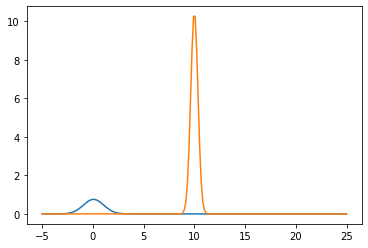

In [5]:
fig, ax = plt.subplots()
psi = simulate(psi)
line, = ax.plot(x, print_psi(psi))
ax.plot(x, set_v(x))

In [32]:
%matplotlib widget
def create_video(psi, x):
    
    fig, ax = plt.subplots()
    psi = simulate(psi)
    line, = ax.plot(x, print_psi(psi))
    ax.plot(x, set_v(x))

    def animate(i):
        psi  = simulate(psi)
        line.set_data(x, print_psi(psi))  # update the data.
        print(i)
        return line,
    
    def init():
        line.set_data(x, print_psi(psi)) 
        
    return line,

    anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=2000, interval=20, blit=True)

    plt.show()

    return anim

anim = create_video(psi, x)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
#zeby sprawdzic czy jakakolwiek animacja dziala
def film():
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=200, interval=20, blit=True)
    return anim
anim = film()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …